<a href="https://colab.research.google.com/github/Suchithrareddyn/Electricity-Bills/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment setup

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

#Data loading

In [4]:
df=pd.read_csv("/content/drive/MyDrive/EDA PROJECT/file.csv")
df.head()

,Unnamed: 0,bill_id,account_id,billing_amount,current_balance,pay_cre_dt,due_dt,tender_type,tender_type_descr,has_email,bill_mailed,dwelling_type_desc,has_med_cert,is_equal_pay_acct,own_rent,is_renewable,is_web_registered,pge_account_months,pge_customer_months,premise_type_code,median_hh_income,median_age,avg_hh_size,gini_index,avg_hours_worked,median_monthly_housing_costs,perc_industry_agriculture_forestry,perc_industry_construction,perc_industry_manufacturing,perc_industry_wholesale_trade,perc_industry_retail_trade,perc_industry_transportation_utilities,perc_industry_information,perc_industry_finance_real_estate,perc_industry_prof_sci_mgmt_admin_waste,perc_industry_education_health_social,perc_industry_arts_ent_accom_food,perc_industry_other_services,perc_industry_public_admin,perc_hh_has_computing_devices,perc_hh_has_no_computing_devices,perc_educ_8th_grade,perc_educ_9th_grade,perc_educ_10th_grade,perc_educ_11th_grade,perc_educ_12th_grade_no_diploma,perc_educ_high_school_diploma,perc_educ_ged,perc_educ_1_yr_college_no_degree,perc_educ_multi_yr_college_no_degree,perc_educ_associates_degree,perc_educ_bachelors_degree,perc_educ_masters_degree,perc_educ_professional_degree,perc_educ_doctorate_degree,perc_pop_not_in_labor_force,perc_pop_in_civ_labor_force_unemp,perc_hh_type_family_married,perc_hh_type_single_parent,perc_hh_type_nonfamily_roommates,perc_hh_type_nonfamily_bach,perc_health_ins_private,perc_native,perc_foreign_natur,perc_foreign_noncit,perc_work_transp_car,perc_work_transp_public,perc_mortgage_has_mort_2nd_only,perc_mortgage_has_mort_heloc_only,perc_mortgage_has_mort_2nd_and_heloc,perc_mortgage_has_mort_no_2nd_no_heloc,perc_hh_workers_none,perc_hh_workers_1,perc_hh_workers_2,perc_hh_workers_3ormore,perc_poverty_lev_below,perc_hh_welfare_received,perc_hh_inc_to_pov_lev_0to0.5,perc_hh_inc_to_pov_lev_0.5to1,perc_hh_inc_to_pov_lev_1to1.25,perc_hh_inc_to_pov_lev_1.25to1.5,perc_hh_inc_to_pov_lev_1.5to1.85,perc_hh_inc_to_pov_lev_1.85to2,perc_hh_inc_to_pov_lev_2andover,late
0,0,0,0,97.23,-81.50,2018-12-11 16:03:51,2018-12-19 00:00:00,CHCK,Check,True,1.0,SingleFamily,False,False,O,False,True,34.0,258.0,HOU,72031.0,38.7,2.91,0.3443,37.2,1262.0,0.032565,0.094689,0.160321,0.029058,0.110721,0.021543,0.01002,0.034068,0.092685,0.237976,0.082164,0.056112,0.038076,0.944817,0.055183,0.001216,0.017018,0.003241,0.009319,0.01175,0.237034,0.051864,0.096029,0.161264,0.080227,0.216775,0.076175,0.009319,0.028768,0.307488,0.040846,0.655481,0.117823,0.046234,0.180462,0.064112,0.835249,0.055939,0.108812,0.910594,0.034625,0.027265,0.077397,0.0,0.578716,0.199105,0.367636,0.307979,0.12528,0.128834,0.111111,0.043456,0.085378,0.099949,0.034254,0.013548,0.012781,0.710634,0
1,1,1,0,86.02,-97.23,2019-01-10 16:03:54,2019-01-22 00:00:00,CHCK,Check,True,1.0,SingleFamily,False,False,O,False,True,34.0,258.0,HOU,72031.0,38.7,2.91,0.3443,37.2,1262.0,0.032565,0.094689,0.160321,0.029058,0.110721,0.021543,0.01002,0.034068,0.092685,0.237976,0.082164,0.056112,0.038076,0.944817,0.055183,0.001216,0.017018,0.003241,0.009319,0.01175,0.237034,0.051864,0.096029,0.161264,0.080227,0.216775,0.076175,0.009319,0.028768,0.307488,0.040846,0.655481,0.117823,0.046234,0.180462,0.064112,0.835249,0.055939,0.108812,0.910594,0.034625,0.027265,0.077397,0.0,0.578716,0.199105,0.367636,0.307979,0.12528,0.128834,0.111111,0.043456,0.085378,0.099949,0.034254,0.013548,0.012781,0.710634,0
2,2,2,0,82.94,-86.02,2019-02-11 16:04:24,2019-02-20 00:00:00,CHCK,Check,True,1.0,SingleFamily,False,False,O,False,True,34.0,258.0,HOU,72031.0,38.7,2.91,0.3443,37.2,1262.0,0.032565,0.094689,0.160321,0.029058,0.110721,0.021543,0.01002,0.034068,0.092685,0.237976,0.082164,0.056112,0.038076,0.944817,0.055183,0.001216,0.017018,0.003241,0.009319,0.01175,0.237034,0.051864,0.096029,0.161264,0.080227,0.216775,0.076175,0.009319,0.028768,0.307488,0.040846,0.655481,0.117823,0.046234,0.180462,0.064112,0.835249,0.055939,0.108812,0.910594,0.034625,0.027265,0.077397,0.0,0.578716,0.199105,0.367636,0.307979,0.12528,0.128834,0

In [5]:
df.shape

(158363, 85)

There are total 85 columns
Taking only important columns required for analysis
drops = list(df.columns[19:])

In [7]:
df = df[['bill_id','account_id','billing_amount','current_balance','pay_cre_dt','due_dt','tender_type','tender_type_descr','has_email','bill_mailed','dwelling_type_desc','has_med_cert','is_equal_pay_acct',
      'own_rent','is_renewable','is_web_registered','pge_account_months','pge_customer_months','premise_type_code']]
df.head()

,bill_id,account_id,billing_amount,current_balance,pay_cre_dt,due_dt,tender_type,tender_type_descr,has_email,bill_mailed,dwelling_type_desc,has_med_cert,is_equal_pay_acct,own_rent,is_renewable,is_web_registered,pge_account_months,pge_customer_months,premise_type_code
0,0,0,97.23,-81.50,2018-12-11 16:03:51,2018-12-19 00:00:00,CHCK,Check,True,1.0,SingleFamily,False,False,O,False,True,34.0,258.0,HOU
1,1,0,86.02,-97.23,2019-01-10 16:03:54,2019-01-22 00:00:00,CHCK,Check,True,1.0,SingleFamily,False,False,O,False,True,34.0,258.0,HOU
2,2,0,82.94,-86.02,2019-02-11 16:04:24,2019-02-20 00:00:00,CHCK,Check,True,1.0,SingleFamily,False,False,O,False,True,34.0,258.0,HOU
3,3,0,91.38,-82.94,2019-03-25 16:04:00,2019-03-21 00:00:00,CHCK,Check,True,1.0,SingleFamily,False,False,O,False,True,34.0,258.0,HOU
4,4,0,68.32,-91.38,2019-04-10 16:04:15,2019-04-19 00:00:00,CHCK,Check,True,1.0,SingleFamily,False,False,O,False,True,34.0,258.0,HOU


In [6]:
df.shape

(158363, 85)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158363 entries, 0 to 158362
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   bill_id              158363 non-null  int64  
 1   account_id           158363 non-null  int64  
 2   billing_amount       158363 non-null  float64
 3   current_balance      158363 non-null  float64
 4   pay_cre_dt           158363 non-null  object 
 5   due_dt               158363 non-null  object 
 6   tender_type          76507 non-null   object 
 7   tender_type_descr    76507 non-null   object 
 8   has_email            158363 non-null  bool   
 9   bill_mailed          158363 non-null  float64
 10  dwelling_type_desc   158329 non-null  object 
 11  has_med_cert         158363 non-null  bool   
 12  is_equal_pay_acct    158363 non-null  bool   
 13  own_rent             158363 non-null  object 
 14  is_renewable         158363 non-null  bool   
 15  is_web_registered

# descriptive statstics

In [10]:
df.describe()

,bill_id,account_id,billing_amount,current_balance,bill_mailed,pge_account_months,pge_customer_months
count,158363.000000,158363.000000,158363.000000,158363.000000,158363.000000,158363.000000,158363.000000
mean,79181.000000,4961.583545,115.968180,-77.913308,0.525325,137.889457,210.082892
std,45715.604677,2868.275677,88.959604,229.985583,0.499360,131.509690,167.050376
min,0.000000,0.000000,-20.810000,-25027.850000,0.000000,3.000000,4.000000
25%,39590.500000,2479.000000,64.570000,-130.360000,0.000000,39.000000,81.000000
50%,79181.000000,4947.000000,93.860000,-80.680000,1.000000,84.000000,201.000000
75%,118771.500000,7443.500000,141.180000,-44.240000,1.000000,201.000000,268.000000
max,158362.000000,9932.000000,2492.960000,20522.850000,1.000000,725.000000,845.000000


In [14]:
## Checking duplicate Values
df.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
158358    False
158359    False
158360    False
158361    False
158362    False
Length: 158363, dtype: bool

In [12]:
df.duplicated().sum()

0

In [15]:
## Checking Missing Values
print(df.isnull().sum()) 

bill_id                    0
account_id                 0
billing_amount             0
current_balance            0
pay_cre_dt                 0
due_dt                     0
tender_type            81856
tender_type_descr      81856
has_email                  0
bill_mailed                0
dwelling_type_desc        34
has_med_cert               0
is_equal_pay_acct          0
own_rent                   0
is_renewable               0
is_web_registered          0
pge_account_months         0
pge_customer_months        0
premise_type_code          0
dtype: int64


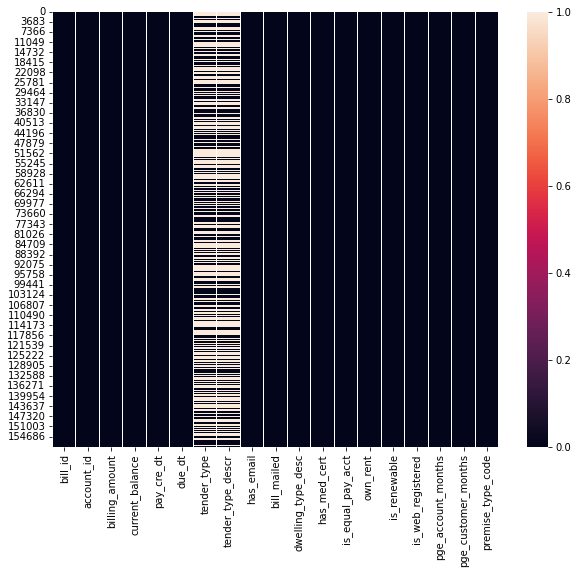

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isna())

# **Handling Null values**

In [18]:
df["tender_type"].isnull().sum()

81856

In [19]:
mode= df.tender_type.mode()
mode
#The most common payment method is through Check

0    CHCK
dtype: object

In [20]:
df.groupby(['tender_type']).size()

tender_type
CACK        7
CASH     4281
CC        256
CHCK    70451
CMT      1365
DEBT       39
MO        108
dtype: int64

In [21]:
#let's fill the NULLs with "CHCK" value
df['tender_type_filled'] =df['tender_type'].fillna(value='CHCK')
df['tender_type_filled'].isnull().sum()

0

In [22]:
df.groupby(['tender_type_filled']).size()

tender_type_filled
CACK         7
CASH      4281
CC         256
CHCK    152307
CMT       1365
DEBT        39
MO         108
dtype: int64

In [23]:
df["tender_type_descr"].isnull().sum()

81856

In [24]:
df.groupby(['tender_type_descr']).size()
#The most common payment method is through Check

tender_type_descr
Cash                4281
Cashier's Check        7
Check              70451
Commitment          1365
Credit Card          256
Debit Card            39
Money Order          108
dtype: int64

In [25]:
# Filling the null values with the most common value "check "
df['tender_type_descr1'] =df['tender_type_descr'].fillna(value='check')
df['tender_type_descr1'].isnull().sum()

0

In [26]:
df["dwelling_type_desc"].isnull().sum()

34

In [27]:
df.groupby(['dwelling_type_desc']).size()

dwelling_type_desc
Manufactured      7652
MultiFamily      45931
Other              189
SingleFamily    104557
dtype: int64

In [28]:
# Filling the null values with the most common value "MultiFamily"
df['dwelling_type_filled'] =df['dwelling_type_desc'].fillna(value='MultiFamily')
df['dwelling_type_filled'].isnull().sum()

0

In [37]:
### Summary Statistics ###
df_summary = df[['billing_amount','current_balance','pge_account_months','pge_customer_months']]
df_summary.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
billing_amount,158363.0,115.968180,88.959604,-20.81,64.57,93.86,141.18,2492.96
current_balance,158363.0,-77.913308,229.985583,-25027.85,-130.36,-80.68,-44.24,20522.85
pge_account_months,158363.0,137.889457,131.509690,3.00,39.00,84.00,201.00,725.00
pge_customer_months,158363.0,210.082892,167.050376,4.00,81.00,201.00,268.00,845.00


## **Univariate analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


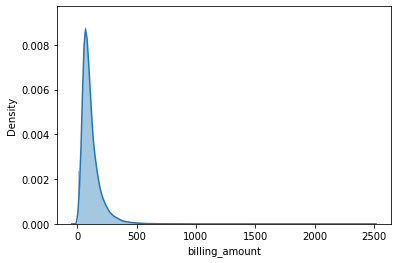

In [29]:
## Checking underlying distributions of numerical variables##
sns.distplot(df["billing_amount"],bins = "auto")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


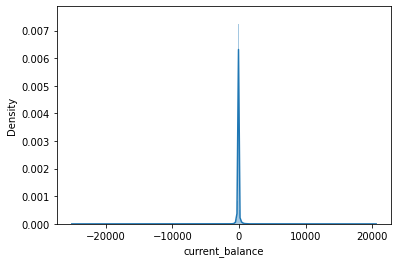

In [30]:
sns.distplot(df["current_balance"],bins = "auto")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


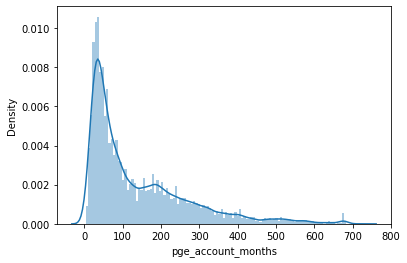

In [31]:
sns.distplot(df["pge_account_months"],bins = "auto")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


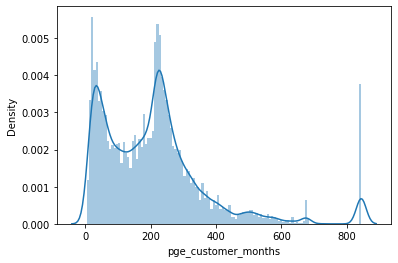

In [32]:
sns.distplot(df["pge_customer_months"],bins = "auto")

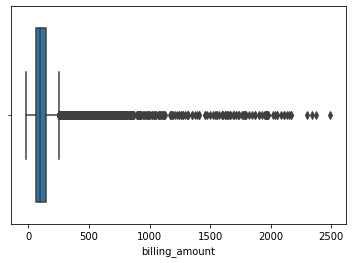

In [34]:
### box plots to check if there are any outliers in numerical variables ###
sns.boxplot(x=df['billing_amount'])

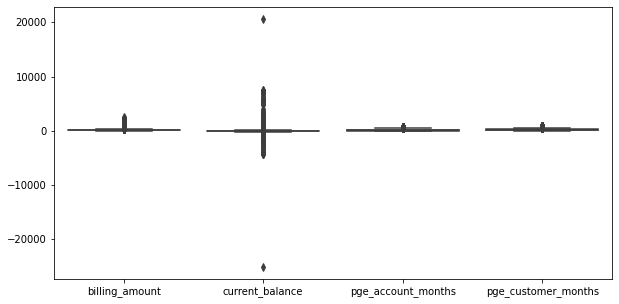

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df_summary)

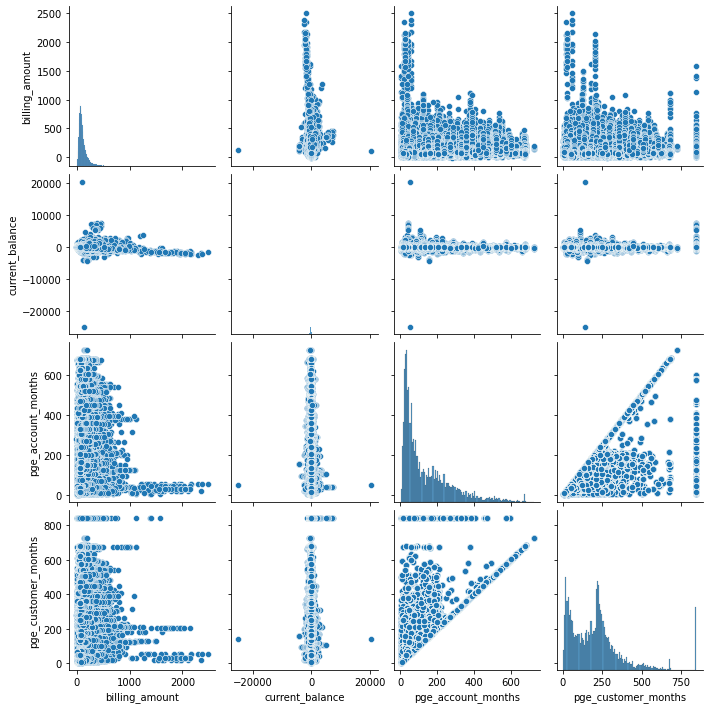

In [39]:
### checking correlations among numerical variables ##
sns.pairplot(df_summary)

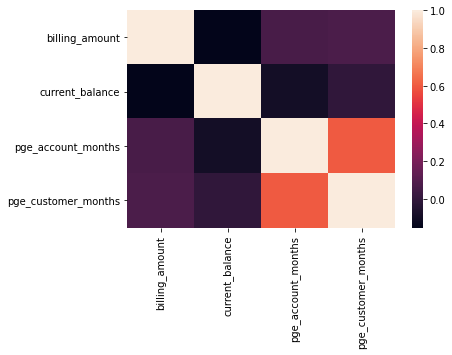

In [40]:
sns.heatmap(df_summary.corr())

In [41]:
### checking the min and max date due_date column ##
print(df['due_dt'].min())
print(df['due_dt'].max())

2018-10-03 00:00:00
2020-05-13 00:00:00


In [42]:
### checking the no of unique account level id's ###
unique_ac_id = len(df['account_id'].unique().tolist())
unique_ac_id

9933